# Individual Assignment - Classification

**----- Import all libraries here -----**

In [1]:
# data manipulation
import pandas as pd
import numpy as np
# visualiation
import matplotlib.pyplot as plt
import seaborn as sns
# model training

# classifiers


#metrics


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Data Analysis 

<span style="color:blue">Load the CSV file into a *DataFrame* object named **pima** using Pandas to examine the dataset and perform data cleaning:</span>
    
<span style="color:blue">1) Print the dtype of each column to review the data types of the attributes in the dataset. *(2 points)*</span>

In [2]:
# --- Your code here ---
pima = pd.read_csv('diabetes.csv')
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<span style="color:blue">2) Are there any missing values in the dataset? Print out the total count of missing values for the attributes in the dataset. How would you handle the missing values without deleting any record? Develop and execute an operation for that purpose accordingly. *(3 points)*</span>

In [3]:
# --- Your code here ---
missing_values = pima.isnull().sum()
print(missing_values)
# fill missing data with average value.
mean_values = pima.mean()
pima_filled = pima.fillna(mean_values)

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     0
dtype: int64


<span style="color:blue">--- Your answer here ---</span>
There are missing values in BloodPressure, SkinThickness, and DiabetesPedigreeFunction.
We can see that the data types of missing data are all numeric and there is only a small amount of missing data. So we choose to fill with average value.
This method is simple and does not introduce additional bias, is suitable for cases where the number of missing values is small, and assumes that the missing values are randomly distributed.
<span style="color:black"> </span>

<span style="color:blue">3) Examine Outcome by generating a bar plot showing the count of “0” and “1” in Outcome. Write down any of your insights from observing the bar plot. *(3 points)*</span>

Text(0, 0.5, 'Count')

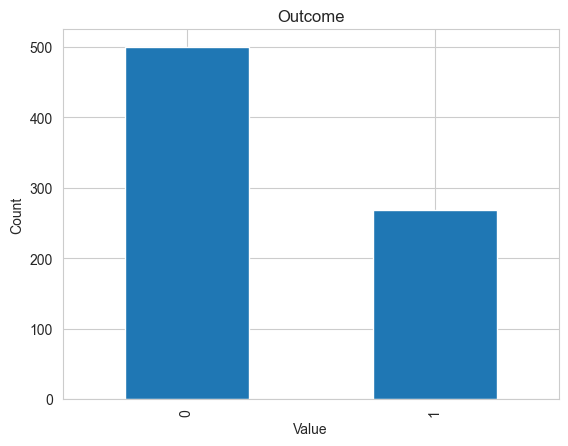

In [4]:
# --- Your code here ---
#sb.set(style=“dargrid”)
#df1=sb.melt(pima)
outcome_count_value = pima_filled['Outcome'].value_counts()
outcome_count_value.plot(kind='bar')
plt.title('Outcome')
plt.xlabel('Value')
plt.ylabel('Count')

<span style="color:blue">--- Your answer here ---</span>
1. We can see there is category imbalance. Observing that the number of diseased persons is 500 and the number of non-diseased persons is close to 300, it can be observed that there is some discrepancy between the number of diseased persons and the number of non-diseased persons in the dataset. This implies that the impact of category imbalance may need to be considered in subsequent modeling or analysis and addressed accordingly.
2. This information can help us better predict the distribution of outcomes. By looking at the bar chart, we can get an idea of the distribution of outcomes in terms of diseased or not diseased. In this case, the number of people with the disease is high and the number of people without the disease is low. This is useful for understanding the general trend of prevalence in the dataset and can help us assess the challenges and goals of a modeling or analysis task.
<span style="color:black"> </span>

<span style="color:blue">4) Generate a pairwise relationship scatterplot (8x8 subplots) using __sb.pairplot(pima, vars=feature_column_names, hue='Outcome')__. *(2 points)*</span>

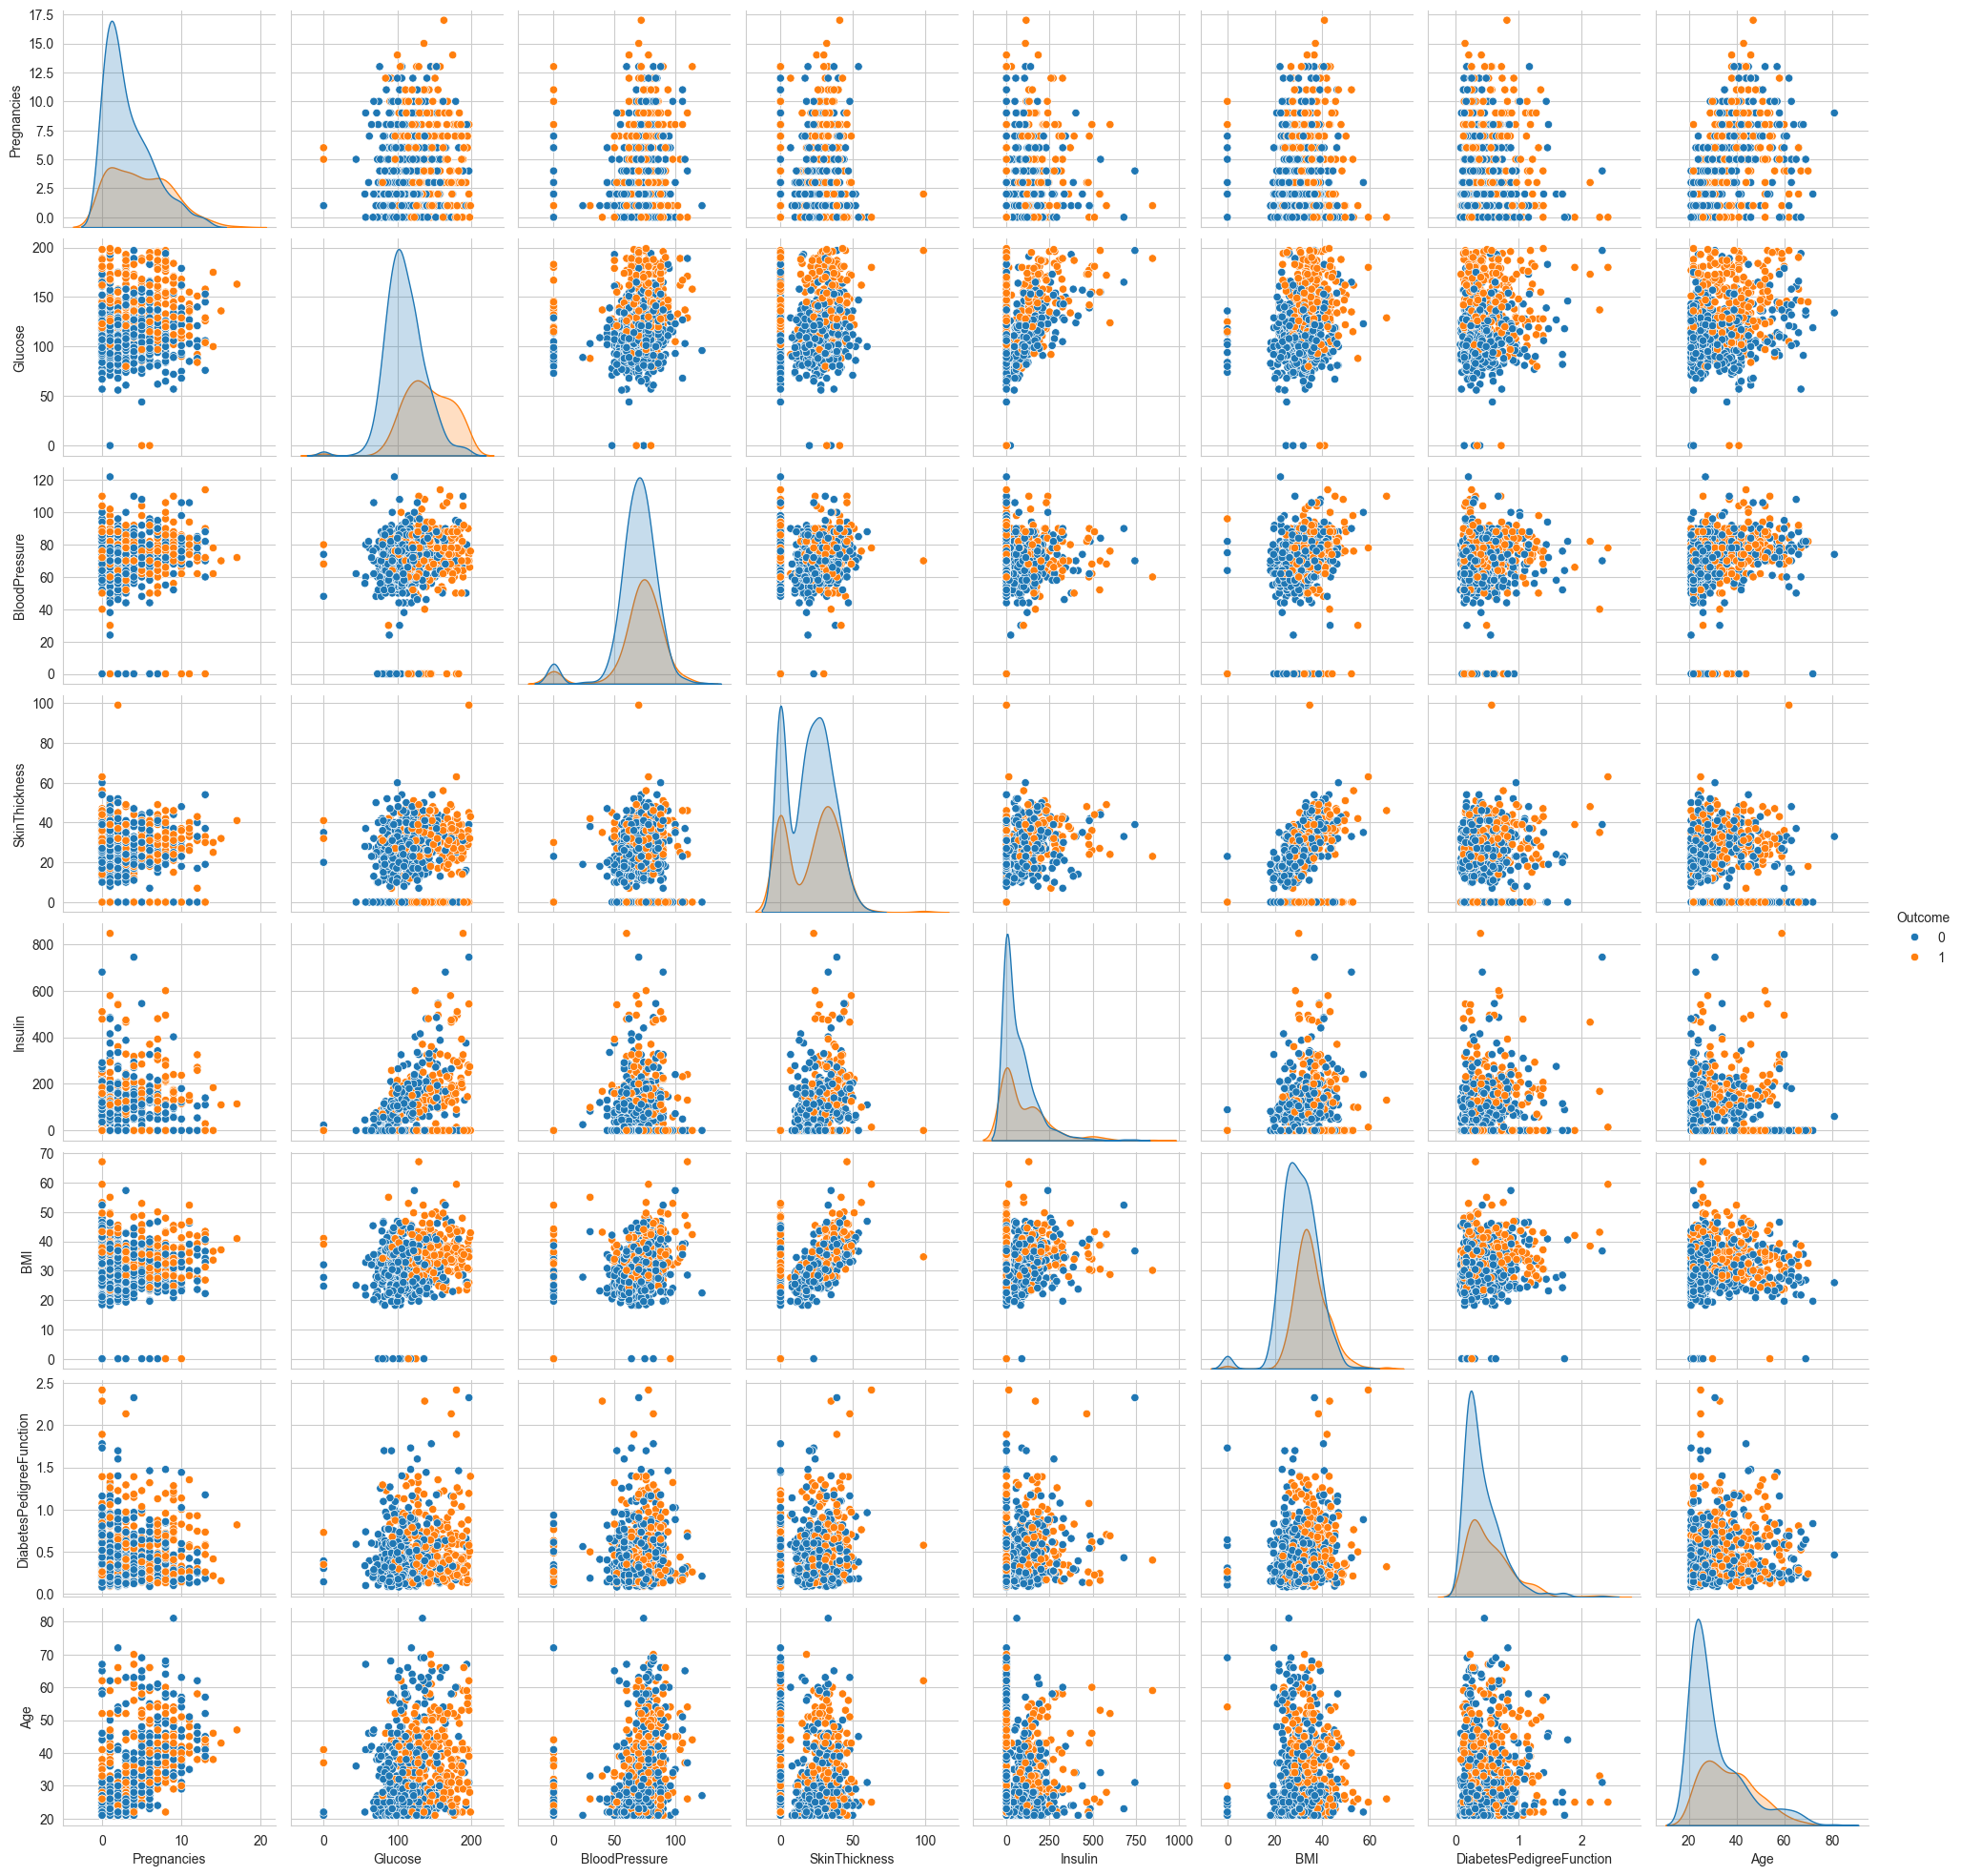

In [5]:
# --- Your code here ---
features = pima_filled.drop('Outcome', axis=1)
data = pd.concat([features,pima_filled['Outcome']],axis=1)
sns.pairplot(data,hue='Outcome')
plt.show()

<span style="color:blue">5) Generate a 9x9 heatmap plot showing the co-variance between any two features (including target). *(2 points)*<br/>
    
<span style="color:blue">_(Hint: use __sb.clustermap(pima.corr(), annot=True)__ to plot co-variance heatmap.)_</span>

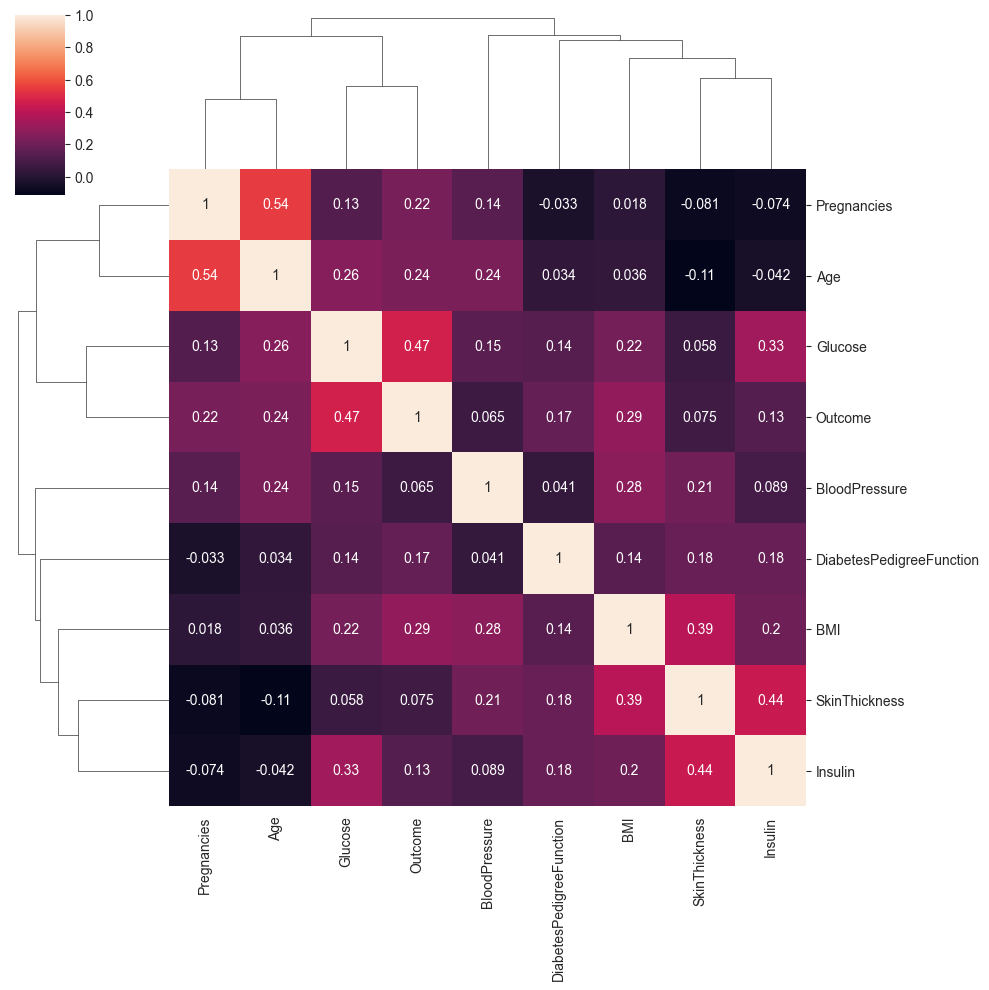

In [6]:
# --- Your code here ---
sns.clustermap(data.corr(),annot=True)

<span style="color:blue">6) What are the insights you gained from the two plots generated from 4) and 5)? *(3 points)*</span>

<span style="color:blue">_(Hint: think about how to perform feature selection based on the observations, which may be helpful for constructing your best model in Section 4.)_</span>

<span style="color:blue">--- Your answer here ---</span>
1. From the scatterplot, we can roughly infer that the higher Glucose and BMI, the probability of Outcome being 1 higher. That is, Glucose and BMI are both positively correlated with Outcome being 1.
2. From the heatmap, we can infer that there is high correlation between SkinThickness and Insulin,BMI and SkinThickness, Pregnancies and age, Outcome and Glucose.
3. From above, we can see Outcome and Glucose are high correlated.
<span style="color:black"> </span>

# 2. Feature Transformation

We observe that all the variables in the dataset except the target variable *Outcome* are continuous. In this section, you will perform feature transformation on the continuous variables to generate two sets of features that will be used in the subsequent classification task.

**Feature set 1 - Continuous to Categorical**

<span style="color:blue">1) Often when dealing with continuous variables like *BMI* or *BloodPressure*,  we may wish  to transform these continuous variables into categorical variables, which may be better predictors of *Outcome*. This transformation can be achieved as follows: cut the continuous values of each feature into non-overlapping buckets.  Perform this operation on all 8 continuous variables.  You are to devise you own method to cut the continuous values into buckets. Name the resulting DataFrame as __pima1__. pima1 should still contains 9 conlumns with the same set of column names as pima. Use **pima1.head()** to show the top rows. *(5 points)*</span>
    
<span style="color:blue">*(Hint: you can use **pandas.cut()** or **pandas.qcut()** to convert continuous feature to categorical feature. e.g. For Glucose, if you wish to adopt the glucose level guidelines given by American Diabetes Association, you can convert its values into 3 groups:<br/>*
*- Normal > 140mg/dl of glucose,<br/>*
*- Prediabete 140-199mg/dl of glucose,<br/>*
*- Diabetes > 200mg/dl of glucose<br/>*
*using  **pd.cut(pima[’Glucose’],[50,139.99,199.99,250], labels=[0, 1, 2])**. Or you can use **pd.qcut(pima[’Glucose’],4, labels=[0,1,2,3])** to cut the values according to quantile-based discretization function.)*
</span>

In [7]:
# --- Your code here ---
# 将怀孕次数，年龄，皮肤厚度，DiabetesPedigreeFunction，使用qcut切分
pregnancies_list = pd.qcut(pima_filled['Pregnancies'],4,labels=[0,1,2,3])
age_list = pd.qcut(pima_filled['Age'],4,labels=[0,1,2,3])
skinThickness_list = pd.qcut(pima_filled['SkinThickness'],4,labels=[0,1,2], duplicates='drop')
DiabetesPedigreeFunction_list = pd.qcut(pima_filled['DiabetesPedigreeFunction'],4,labels=[0,1,2,3])
# 葡萄糖含量，血压，BMI，胰岛素含量按照正常范围值分桶
glucose_list = pd.cut(pima_filled['Glucose'],[-0.01,139.99,200.99,250], labels=[0, 1, 2])
blood_pressure_list = pd.cut(pima_filled['BloodPressure'],[20,59.99,90.99,200],labels=[0,1,2])
BMI_list = pd.cut(pima_filled['BMI'],[-0.01,18.49,25.59,29.9,100],labels=[0,1,2,3])
insulin_list = pd.cut(pima_filled['Insulin'],[-0.01,49.99,200.99,1000],labels=[0,1,2])
pima1 = pd.DataFrame([pregnancies_list,glucose_list,blood_pressure_list,skinThickness_list,insulin_list,BMI_list,DiabetesPedigreeFunction_list,age_list,pima_filled['Outcome']]).T.reset_index(drop=True)

In [8]:
# check if there are some NaN in pima1, if exists NaN, check if is an outlier. If so, replace outlifer with average value and transform again.
print(pima1.isnull().sum())
# we find 38 NaN in BloodPressure field. See what they exactly are.
outliers = pima_filled[(pima_filled['BloodPressure'] < 20) | (pima_filled['BloodPressure'] > 200)]
print(outliers)

Pregnancies                  0
Glucose                      0
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115            0.0            0.0        0  35.3   
15             7      100            0.0            0.0        0  30.0   
49             7      105            0.0            0.0        0   0.0   
60             2       84            0.0            0.0        0   0.0   
78             0      131            0.0            0.0        0  43.2   
81             2       74            0.0            0.0        0   0.0   
172            2       87            0.0           23.0        0  28.9   
193           11      135            0.0            0.0        0  52.3   
222            7      119            0.0  

In [9]:
# we can see that the outliers are 0. Replace 0 with average value and transform again. And then there is no NaN.
blood_pressure_list = pd.cut(pima_filled['BloodPressure'].replace(0,pima_filled['BloodPressure'].median()),[20,59.99,90.99,200],labels=[0,1,2])
blood_pressure_list.isnull().sum()

0

In [10]:
pima1 = pd.DataFrame([pregnancies_list,glucose_list,blood_pressure_list,skinThickness_list,insulin_list,BMI_list,DiabetesPedigreeFunction_list,age_list,pima_filled['Outcome']]).T.reset_index(drop=True)

In [11]:
pima1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,1,1,2,0,3,3,3,1
1,0,0,1,1,0,2,1,2,0
2,3,1,1,0,0,1,3,2,1
3,0,0,1,0,1,2,0,0,0
4,0,0,0,2,1,3,3,2,1


<span style="color:blue">2) Next, we convert the generated categorical features into binary features using the **one-hot encoding scheme**. Assume the continuous feature has m numerical labels. The one-hot encoding scheme will results in a vector of size m with only one of the values as 1 (indicating it as active). Use **pima1.head()** to show the top rows of the encoded pima1. *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **pd.getdummies()** to convert each categorical feature in pima1 into multiple binary features.)*</span>

In [12]:
# --- Your code here ---
encoded_df_list = []

# 对每一列进行 One-Hot Encoding
for column in pima1.drop("Outcome",axis=1).columns:
    encoded_column = pd.get_dummies(pima1[column], prefix=column)
    encoded_df_list.append(encoded_column)
encoded_df_list.append(pima1['Outcome'])
# 将所有编码后的列连接起来
encoded_pima1 = pd.concat(encoded_df_list, axis=1)
encoded_pima1.head()

,Pregnancies_0,Pregnancies_1,Pregnancies_2,Pregnancies_3,Glucose_0,Glucose_1,BloodPressure_0,BloodPressure_1,BloodPressure_2,SkinThickness_0,...,BMI_3,DiabetesPedigreeFunction_0,DiabetesPedigreeFunction_1,DiabetesPedigreeFunction_2,DiabetesPedigreeFunction_3,Age_0,Age_1,Age_2,Age_3,Outcome
0,False,False,True,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,True,1
1,True,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,0
2,False,False,False,True,False,True,False,True,False,True,...,False,False,False,False,True,False,False,True,False,1
3,True,False,False,False,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,False,0
4,True,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,1


<span style="color:blue">3) Discuss whether the use of one-hot encoding can be omitted and why? *(3 points)*</span>

<span style="color:blue">--- Your answer here ---</span>
The use of one-hot encoding can be omitted. The reasons are as follows:
1. One-Hot Encoding is primarily used to convert categorical variables into numerical features for processing by machine learning algorithms. However, the binning results generated using the `pd.cut()` function are already discrete categories, each represented by an integer or label.
2. These labels are already able to directly represent the binned information of the data without further One-Hot Encoding.
3. If we perform One-Hot Encoding on the DataFrame that we get after converting it with `pd.cut()`, the result may be an expansion of the feature dimensions. This means that we will create a new binary feature column for each category, thus increasing the dimensionality and complexity of the dataset.
<span style="color:black"> </span>

**Feature set 2 - Features normalization**

<span style="color:blue">4) For the second feature set, we normalize the values of 8 continuous variables. For each variable, we apply the transformation using the formula **z=(x−u)/s**, where u and s are the mean and standard deviation of the variable values. Name the resulting DataFrame as **pima2**, and show the top rows using pima2.head(). *(2 points)*</span>

<span style="color:blue">*(Hint: you can use **StandardScaler** from scikit-learn for standadization purpose)*</span>

In [8]:
# --- Your code here ---


<span style="color:blue">5) Briefly discuss whether Feature set 1 or Feature set 2 is more useful for training classification models and why? Also comment on whether feature normalization is necessary in this case. *(3 points)*</span>

<span style="color:blue">--- Your answer here ---</span>

<span style="color:black"> </span>

# 3. Model Construction

Your task in this section is to use the derived feature sets from previous section to construct classification models for diabetes outcome prediction (0 or 1).  We have splitted the data into training and test sets for you as shown below (you need to run the cell below).

In [11]:
# pima1 split
# Feature set 1
x1 = pima1.drop(columns='Outcome')
y1 = pima1['Outcome']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state=0)

# pima2 split
# Feature set 2
x2 = pima2.drop(columns='Outcome')
y2 = pima2['Outcome']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state=0)

print(x1.shape, y1.shape)
print(x2.shape, y2.shape)

(768, 30) (768,)
(768, 8) (768,)


<span style="color:blue">1) Experiment with the 5 classification models below from scikit-learn with their default hyperparameter settings on pima1 and pima2 (You should thus perform 5x2 times model training and evaluation):<br/></span>

<span style="color:blue">- Gaussian naive bayes</span><br/>
<span style="color:blue">- KNN</span><br/>
<span style="color:blue">- SVM</span><br/>
<span style="color:blue">- logistic regression</span><br/>
<span style="color:blue">- decision tree<br/></span>
    
<span style="color:blue">You should perform model training on x_train1 and x_train2,  and perform evaluation on x_test1 and x_test2 respectively.  Use **accuracy** and **weighted F1** as evaluation metrics, and save the results of different models in the defined lists **pima1_acc**, **pima2_acc**, **pima1_f1**, **pima2_f1**. Note that the order of results in each list should match the model order provided in **model_names**. Print the **accuracy_record** table and **F1_record** table using the provided code. *(20 points)*</span>

In [9]:
model_names = ['Gaussian NB', 'KNN', 'SVM', 'LR', 'DT']
pima1_acc = []
pima2_acc = []
pima1_f1 = []
pima2_f1 = []

# --- Your code here ---



<span style="color:blue">2) According to the results above, which feature set is better, pima1 or pima2? Select one to be used in the following tasks. *(2 points)*</span>

<span style="color:blue">--- Your answer ---</span>

<span style="color:black"> </span>

<span style="color:blue">3) Select one classification model from 1). Discuss which are the hyperparameters that may affect the model performance the most. Perform grid search with 10 folds cross-validation for tuning those hyperparameters on the training set of either pima1 or pima2 (according to your choice in 2)), using accuracy as the scoring metric. Print the configuration of the best selected model and its prediction **accuracy** and **weighted F1** scores on the corresponding test set. *(15 points)*</span>

<span style="color:blue">*(Hint: for each selected hyperparameter, you need to prepare a list of reasonable values for tunining. Use **sklearn.model_selection.GridSearchCV** for grid search.)*</span>

<span style="color:blue">--- Your choice of hyperparameters here ---</span>

<span style="color:black"> </span>

In [10]:
# --- Your code here ---


<span style="color:blue">4) Besides accuracy and F1 scores, one can look at the confusion matrix to understand the model's prediction behaviour. Compare confusion matrix on test data before and after hyperparameter tuning for the selected model in 3). Discuss any of your observations or insights. *(5 points)*</span>

<span style="color:blue">*(Hint: you can use **confusion_matrix** from scikit-learn, and use **sb.heatmap(conf_matrix, annot=True)** to plot a corresponding heatmap for better visualization.)*</span>

In [11]:
# --- Your code here ---


<span style="color:blue">--- Your observations here ---</span>

<span style="color:black">  </span>

<span style="color:blue">5) You can get feature importances for some tree-based classifiers in scikit-learn via **clf.feature_importances_**. Example code for plotting pima2 feature importances for an adaboost decision tree classifier has been given below. Generate the plot and describe your observations. Briefly describe how the feature importances for the given classifier can be computed. *(5 points)*</span>

In [12]:
# --- Your code here ---


# Plot feature importances


<span style="color:blue">--- Your description here ---</span>

<span style="color:black"> </span>

<span style="color:blue">6)  Think  about  how  to  compute  the  feature  importances  for  other  classifiers  in  1).   Select  one classifier (except decsion tree), and generate a similar bar plot showing the feature importances. *(8 points)*</span>

In [13]:
# --- Your code here ---


In [14]:
# --- Your code here ---


# 4. Best Model Construction

<span style="color:blue">1) Generate the best classifier you can for predicting the diabetes outcome. Show the classification **accuracy**, **weighted F1** and **confusion matrix** on test data (you should keep the original train test split). Besides that, you can also show any result or plot that are helpful for us to better understand your model. Write a short description of you model indicating the elements that help to improve prediction. You may use any classifier including but not limited to those experimented above. Marks will be given based on your model performance and description. *(13 points)*</span>

<span style="color:blue">*(Hint: you can think about improving the model performance from different aspects: e.g. improve the feature set; choose a more sophisticated classifier such as ensemble models; or improve the training process via careful hyperparameter tunning or sampling techniques.)*</span>

<span style="color:blue">--- Your description here ---</span>

<span style="color:black">  </span>

In [24]:
x_train2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [15]:
# --- Your code here ---
# over sampling

<span style="color:blue">--- Your description here ---</span>

<span style="color:black">  </span>

<span style="color:blue">--- Your description here ---</span>

<span style="color:black">  </span>

In [ ]:
# --- Your code here ---
# tuning

<span style="color:blue">--- Your description here ---</span>

<span style="color:black"> </span>

In [ ]:
# --- Your code here ---
# best model


<span style="color:blue">2) Can the final model you constructed be deployed at the hospital to diagnose patients automatically?  How would the doctors explain the prediction results to the patients?  Write down any of your opinions or concerns. *(2 points)*</span>

<span style="color:blue">--- Your opinion here ---</span>

<span style="color:black"> </span>